> **Data Analytics**: Welcome to the Investigate a Dataset project! Most people can understand the visualizations, as 40% of the people can answer basic questions about the information provided on the record visualizations. Therefore, when providing information in the form of linear charts, people show a good understanding of the plotsand provide accurate forecasts in this project..

# Project: Analysis of the reasons for success and failure in the movie industry

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

> Success in any film production business requires great potential, especially in light of competition from major companies with long experience.Choosing the content for the audience’s desire remains the first of the basics, as diversity in films, whether Funny, social, historical, etc. has its own audience.

> Perhaps the success of the drama is due to many factors, including excitement, photography and the content of the story, in addition to employing the talents required. Therefore, we see films at the top that generate revenues and films at the bottom that do not achieve anything. In this study, we analyze data on the revenues of films most interested and compare production success in the film industry.

In [9]:
#importing library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("darkgrid")
%matplotlib inline

In [10]:
# Load dataset
df = pd.read_csv('tmdb-movies.csv')
df.head(1)

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09


> Multiple columns have already become a problem in the original data set, this has led to the deletion of many variables and the inclusion of variables of interest to the project.

In [11]:
#dropping unnecessary columns
df.drop(['id','imdb_id','original_title','cast','homepage','tagline','keywords','overview','release_date','vote_average','budget_adj','revenue_adj'], axis = 1, inplace = True)
# iterating the columns 
for col in df.columns: 
    print(col) 

popularity
budget
revenue
director
runtime
genres
production_companies
vote_count
release_year


> تم تقديم إيصالات في المشروع  الإيرادات كمتغير تابع ، مع تقييمات popularity,budget,revenue,director,runtime,genres,production_companies,vote_count,release_year كمتغيرات مستقلة في المشروع النهائي. أظهرت النتائج أن المواد المصدر والمراجعات النقدية وعدد الشاشات وتاريخ الإصدار وبعض الأنواع كانت ذات دلالة إحصائية وساهمت بشكل إيجابي في الإيرادات المحلية للفيلم.

In [12]:
df.shape

(10866, 9)

Series([], Name: budget, dtype: float64)

> #### Checking the columns 'budget', 'revenue', and 'runtime' for 0 values

In [13]:
df.query('budget == 0').budget

30       0
36       0
72       0
74       0
75       0
        ..
10860    0
10861    0
10862    0
10863    0
10864    0
Name: budget, Length: 5696, dtype: int64

In [14]:
# replace the zero values to nan in revenue,runtime and budget column
col_list = ['budget', 'revenue', 'runtime']
df[col_list] = df[col_list].replace(0, np.NAN) # replacing '0' value to NAN 
#dropping NaN value in temp_list 
df.dropna(subset = col_list, inplace = True)

> #### represent modern movies for ten years of forty-nine years

In [15]:
df.release_year

0        2015
1        2015
2        2015
3        2015
4        2015
         ... 
10822    1966
10828    1966
10829    1966
10835    1966
10848    1966
Name: release_year, Length: 3855, dtype: int64

> Our study group that contains 10,866 films that were released worldwide in the years (1966-2015) Given the large number of data samples from movie releases and in order to determine the variables that determine the success of the most popular films, we chose the dataset for years instead of Films every year where five years of forty-nine years (2011-2015) were chosen to represent modern films and five years of forty-nine years (2005-2010) were chosen to represent traditional films and were combined into one large unorganized dataset. This method proved an effective way to answer the research question as it focused on the most profitable films and tried to explain their success, rather than finding similarities between random films that are too small and too big, something that might happen if films were chosen each year randomly and variable data was obtained

In [188]:
df.dtypes

popularity              float64
budget                  float64
revenue                 float64
director                 object
runtime                 float64
genres                   object
production_companies     object
vote_count                int64
release_year              int64
dtype: object

In [16]:
data = df[(df['release_year'] >= 2005) & (df['release_year'] <= 2015)]
data.release_year

0       2015
1       2015
2       2015
3       2015
4       2015
        ... 
7785    2007
7797    2007
7808    2007
7813    2007
7819    2007
Name: release_year, Length: 1879, dtype: int64

<a id='wrangling'></a>
## Data Wrangling

> **Tip**: In this section of the report, you will load in the data, check for cleanliness, and then trim and clean your dataset for analysis. Make sure that you document your steps carefully and justify your cleaning decisions.

### General Properties

> #### Checking the null values

In [17]:
data.isnull().sum()

popularity               0
budget                   0
revenue                  0
director                 1
runtime                  0
genres                   0
production_companies    25
vote_count               0
release_year             0
dtype: int64

In [18]:
df[df.director.isnull()]

,popularity,budget,revenue,director,runtime,genres,production_companies,vote_count,release_year
3276,0.147657,4180000.0,11000000.0,NaN,153.0,Drama|Comedy|Romance|Foreign,Tips Industries,11,2008


> #### Dropping duplicates

In [19]:
sum(data.duplicated())

1

In [20]:
data.drop_duplicates(inplace=True)

C:\Users\usamnet\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [21]:
data.duplicated().sum()

0

> #### Change the data type the revenue and budget column.

In [22]:
l=['budget', 'revenue']
data[l]=data[l].applymap(np.int64)

C:\Users\usamnet\anaconda3\lib\site-packages\pandas\core\frame.py:2963: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


In [23]:
data.dtypes

popularity              float64
budget                    int64
revenue                   int64
director                 object
runtime                 float64
genres                   object
production_companies     object
vote_count                int64
release_year              int64
dtype: object

<a id='eda'></a>
## Exploratory Data Analysis

> **Tip**: Now that you've trimmed and cleaned your data, you're ready to move on to exploration. Compute statistics and create visualizations with the goal of addressing the research questions that you posed in the Introduction section. It is recommended that you be systematic with your approach. Look at one variable at a time, and then follow it up by looking at relationships between variables.

### Research Question 1 ( Comparing modern and traditional movies in the last ten years !)

In [24]:
df_15 = data[(data['release_year'] >= 2011) & (data['release_year'] <= 2015)]
df_15.release_year

0       2015
1       2015
2       2015
3       2015
4       2015
        ... 
5908    2013
5932    2013
6010    2013
6041    2013
6065    2013
Name: release_year, Length: 862, dtype: int64

In [25]:
df_05 = data[(data['release_year'] >= 2005) & (data['release_year'] <= 2010)]
df_05.release_year

1386    2009
1387    2009
1388    2009
1389    2009
1390    2009
        ... 
7785    2007
7797    2007
7808    2007
7813    2007
7819    2007
Name: release_year, Length: 1016, dtype: int64

In [26]:
df_05.shape

(1016, 9)

In [27]:
df_15.shape

(862, 9)

In [28]:
# ensure these queries included each sample exactly once
num_samples = data.shape[0]
num_samples == df_05['revenue'].count() + df_15['revenue'].count() # should be True

True

In [29]:
df_05.describe().revenue

count    1.016000e+03
mean     1.109685e+08
std      1.868657e+08
min      3.000000e+00
25%      1.231831e+07
50%      4.791468e+07
75%      1.228296e+08
max      2.781506e+09
Name: revenue, dtype: float64

In [30]:
df_15.describe().revenue

count    8.620000e+02
mean     1.417822e+08
std      2.322957e+08
min      1.100000e+01
25%      1.113568e+07
50%      5.474676e+07
75%      1.597275e+08
max      2.068178e+09
Name: revenue, dtype: float64

> Through the results it was found that traditional films achieved higher revenues than modern films as a result of the following:
Through an average study where the best movies achieved the highest revenue is 2.781506e+09 while the lowest real revenue is 3.000000e+00 and on that the data set of the traditional films was chosen to know the factors That contributed to success

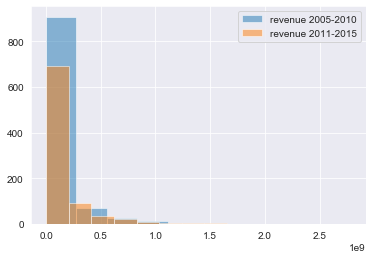

In [31]:
df_05.revenue.hist(alpha=0.5,label='revenue 2005-2010')
df_15.revenue.hist(alpha=0.5,label='revenue 2011-2015');
plt.legend();

### Research Question 2 ( How do movie studios decide which films to place their bets on !)
> Are there common factors, such as the duration of the show, gender, staffing, social style of the audience, or production budget, that explain the financial success of a movie in relation to another?

In [32]:
data.describe().revenue

count    1.878000e+03
mean     1.251120e+08
std      2.094543e+08
min      3.000000e+00
25%      1.173206e+07
50%      5.076060e+07
75%      1.407145e+08
max      2.781506e+09
Name: revenue, dtype: float64

In [33]:
high_revenue = data.revenue>=1.406333e+08
mid_revenue = (data.revenue >= 5.065008e+07) & (data.revenue <= 1.406333e+08)
lower_revenue = (data.revenue >= 1.166930e+07) & (data.revenue <= 5.065008e+07)

#### factor budget relating revenue

In [229]:
data.budget[high_revenue].mean()

101218968.09361702

In [211]:
data.budget[mid_revenue].mean()

39480899.04477612

In [212]:
data.budget[lower_revenue].mean()

23855186.989361703

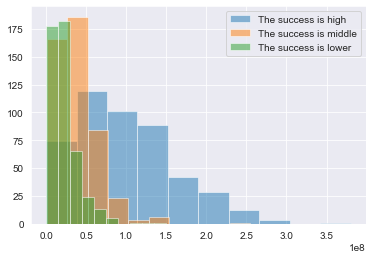

In [222]:
data.budget[high_revenue].hist(label='The success is high',alpha=0.5)
data.budget[mid_revenue].hist(label='The success is middle',alpha=0.5)
data.budget[lower_revenue].hist(label='The success is lower',alpha=0.5);
plt.legend();

The big companies that have big capital for making films make big revenues, while the companies that don't have a big budget make small revenues

#### factor runtime relating revenue

In [225]:
data.runtime[high_revenue].mean()

114.6468085106383

In [226]:
data.runtime[mid_revenue].mean()

108.37100213219617

In [227]:
data.runtime[lower_revenue].mean()

106.19787234042553

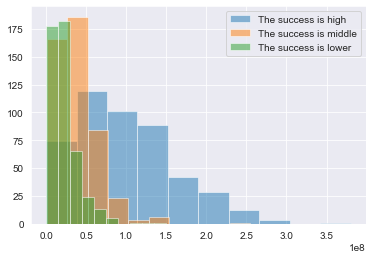

In [228]:
data.budget[high_revenue].hist(label='The success is high',alpha=0.5)
data.budget[mid_revenue].hist(label='The success is middle',alpha=0.5)
data.budget[lower_revenue].hist(label='The success is lower',alpha=0.5);
plt.legend();

#### factor vote_count relating revenue

In [34]:
data.vote_count[high_revenue].mean()

1784.4212765957448

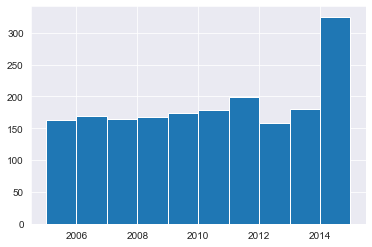

In [35]:
data['release_year'].hist();

In [237]:
sum(data['genres'].str.find('Action')>=0)

493

> In order to analyze the reasons for the success of these films, some questions are asked here:
What is the best so I have not achieved revenue in all years?
The best films that have earned revenue for each year?

In [22]:
df_05.revenue.max()

2781505847

In [26]:
df_05.groupby('release_year').max().revenue

release_year
2005     895921036
2006    1065659812
2007     961000000
2008    1001921825
2009    2781505847
2010    1063171911
Name: revenue, dtype: int64